# Workshop 3: Sentiment anlysis
In this workshop we will learn how to train a neural network with text
as input to classify IMBD rewievs as positive or negative
([info of the data](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)). The main blocks of the workshop are:

1. Get the data from Keras repository and visualize it.
2. Pre-process the data.
3. Design the network.
4. Train the network.
5. Evaluate the model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

# 1. Get the data from Keras repository and visualize it.

In [2]:
# Load the dataset
# Use the default parameters to keras.datasets.imdb.load_data
start_char = 1
oov_char = 2
index_from = 3
(X_train, y_train), (X_test, y_test) = imdb.load_data(start_char=start_char, oov_char=oov_char, index_from=index_from)

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [4]:
# Retrieve the word index file mapping words to indices
word_index = imdb.get_word_index()
word_index['movie']
# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
inverted_word_index
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"

1641221/1641221 [==============================] - 0s 0us/step


In [5]:
inverted_word_index[20]

'movie'

In [7]:
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in X_train[0])
decoded_sequence

"[START] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sh

In [8]:
# Count number of different words
len(inverted_word_index)

88586

In [9]:
print("Training data: ")
print(X_train.shape)
print(y_train.shape)

Training data: 
(25000,)
(25000,)


In [10]:
print("Test data: ")
print(X_test.shape)
print(y_test.shape)

Test data: 
(25000,)
(25000,)


In [11]:
# Summarize number of classes
print("Classes: ")
print(np.unique(y_train))
print(np.unique(y_test))

Classes: 
[0 1]
[0 1]


In [12]:
# Evalute the class distribution
print('Class distribution')
print(np.sum(y_train == 0))
print(np.sum(y_train == 1))
print(np.sum(y_test == 0))
print(np.sum(y_test == 1))

Class distribution
12500
12500
12500
12500


Review length: 
Mean 238.71 words (176.493674)


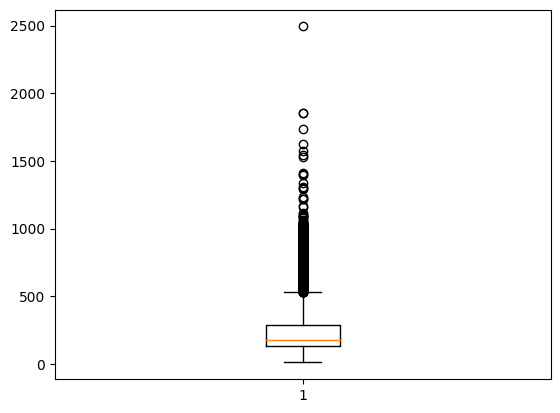

In [13]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X_train]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

Review length: 
Mean 230.80 words (169.161087)


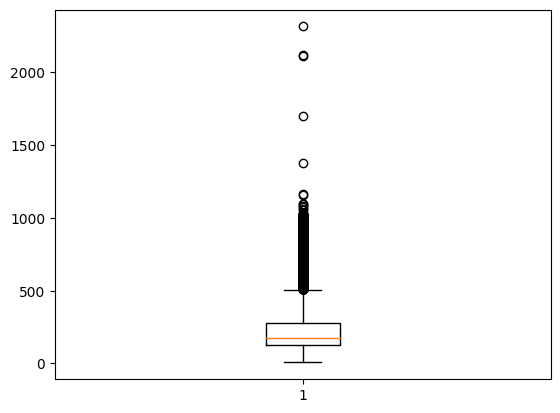

In [14]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X_test]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

# 2. Pre-process the data.

In [15]:
# Re-load the dataset just with the 5000 most common words
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [16]:
# Set the length of the senteces to a fixed size
max_words = 500
X_train = pad_sequences(X_train, maxlen=max_words)
X_test = pad_sequences(X_test, maxlen=max_words)

Review length: 
Mean 500.00 words (0.000000)


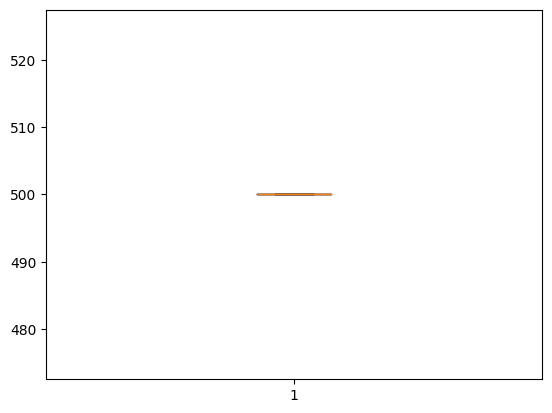

In [17]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X_train]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

# 3. Design the network.

In [18]:
# Create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
# Show a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 256)               4096256   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 4,256,513
Trainable params: 4,256,513
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. Train the network.

In [21]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128, verbose=2)

Epoch 1/5
196/196 - 39s - loss: 0.4738 - accuracy: 0.7466 - val_loss: 0.2920 - val_accuracy: 0.8769 - 39s/epoch - 198ms/step
Epoch 2/5
196/196 - 18s - loss: 0.1729 - accuracy: 0.9349 - val_loss: 0.3083 - val_accuracy: 0.8733 - 18s/epoch - 90ms/step
Epoch 3/5
196/196 - 10s - loss: 0.0537 - accuracy: 0.9856 - val_loss: 0.4075 - val_accuracy: 0.8590 - 10s/epoch - 53ms/step
Epoch 4/5
196/196 - 8s - loss: 0.0105 - accuracy: 0.9986 - val_loss: 0.5061 - val_accuracy: 0.8591 - 8s/epoch - 38ms/step
Epoch 5/5
196/196 - 6s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.5629 - val_accuracy: 0.8644 - 6s/epoch - 30ms/step


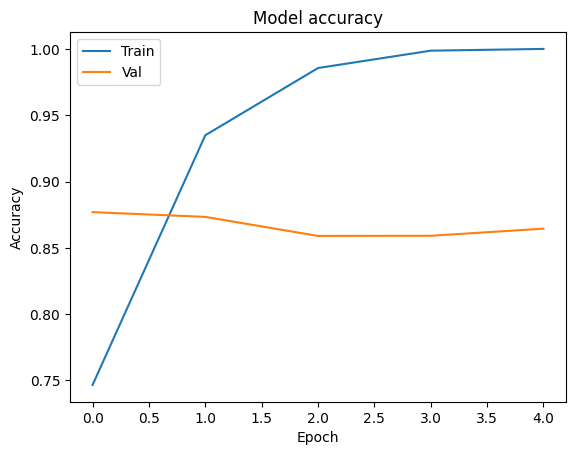

In [22]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
# plt.ylim(0, 1)
plt.show()

# 5. Evaluate the model.

In [23]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.44%


# Exercice 1: Use the learning of the lesson to reduce de overfitting


* reduce the length of the sentences (300)
* reduce the number of neurons (delete hidden cap)
* reduce number of dimensions from vectors (4)

In [40]:
# Re-load the dataset just with the 5000 most common words
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [83]:
# Set the length of the senteces to a fixed size
max_words = 300
X_train = pad_sequences(X_train, maxlen=max_words)
X_test = pad_sequences(X_test, maxlen=max_words)

In [88]:
# Create the model
model = Sequential()
model.add(Embedding(top_words, 4, input_length=max_words)) # converts number to vector to protect with a space to plot relations to other words
model.add(Flatten()) #convert multi-vectors to a single-dim vector (like we did with reshape)
model.add(Dense(1, activation='sigmoid'))  # 2 classes (yes/no)

In [89]:
# Show a summary of the model
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 300, 4)            20000     
                                                                 
 flatten_14 (Flatten)        (None, 1200)              0         
                                                                 
 dense_32 (Dense)            (None, 1)                 1201      
                                                                 
Total params: 21,201
Trainable params: 21,201
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [91]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128, verbose=2)

Epoch 1/5
196/196 - 22s - loss: 0.6657 - accuracy: 0.6152 - val_loss: 0.5807 - val_accuracy: 0.7539 - 22s/epoch - 112ms/step
Epoch 2/5
196/196 - 14s - loss: 0.4435 - accuracy: 0.8316 - val_loss: 0.3650 - val_accuracy: 0.8603 - 14s/epoch - 69ms/step
Epoch 3/5
196/196 - 7s - loss: 0.3102 - accuracy: 0.8833 - val_loss: 0.3106 - val_accuracy: 0.8726 - 7s/epoch - 34ms/step
Epoch 4/5
196/196 - 7s - loss: 0.2604 - accuracy: 0.9018 - val_loss: 0.2907 - val_accuracy: 0.8772 - 7s/epoch - 34ms/step
Epoch 5/5
196/196 - 6s - loss: 0.2310 - accuracy: 0.9149 - val_loss: 0.2783 - val_accuracy: 0.8843 - 6s/epoch - 29ms/step


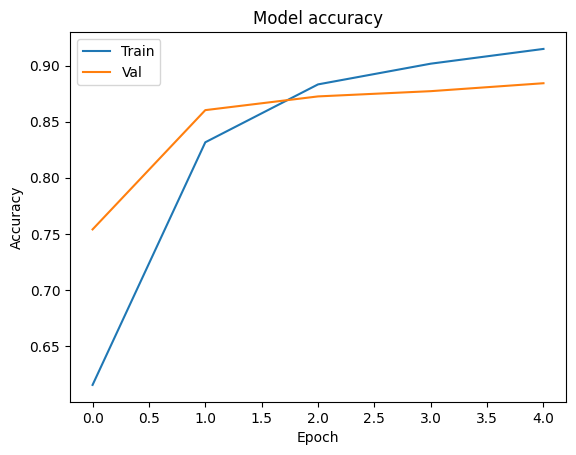

In [92]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
# plt.ylim(0, 1)
plt.show()